In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
c=pd.read_csv('deliveries.csv')

In [3]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [4]:
c.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
d=c[c['match_id']==617].reset_index(drop=True)
d

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,617,1,Royal Challengers Bangalore,Mumbai Indians,1,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,617,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,617,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,617,1,Royal Challengers Bangalore,Mumbai Indians,1,4,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,617,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,617,2,Mumbai Indians,Royal Challengers Bangalore,19,2,JC Buttler,KA Pollard,VR Aaron,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
240,617,2,Mumbai Indians,Royal Challengers Bangalore,19,3,JC Buttler,KA Pollard,VR Aaron,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
241,617,2,Mumbai Indians,Royal Challengers Bangalore,19,4,JC Buttler,KA Pollard,VR Aaron,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
242,617,2,Mumbai Indians,Royal Challengers Bangalore,19,5,KA Pollard,JC Buttler,VR Aaron,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [6]:
d.drop('match_id',axis=1,inplace=True)

In [7]:
d.drop('penalty_runs',axis=1,inplace=True)

In [8]:
d.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Royal Challengers Bangalore,Mumbai Indians,1,1,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,Royal Challengers Bangalore,Mumbai Indians,1,4,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [9]:
d.fillna(0,inplace=True)
wicket6=[]
for i in d["player_dismissed"]:
    if(i==0):
        wicket6.append(0)
    else:
        wicket6.append(1)
d["wickets"]=wicket6

In [10]:
d["batsman"]=d["batsman"].apply(lambda x: x.upper())
d["non_striker"]=d["non_striker"].apply(lambda x: x.upper())
d["bowler"]=d["bowler"].apply(lambda x:x.upper())

In [11]:
Teams=list(d['batting_team'].unique())
Teams1=Teams[0]
Teams2=Teams[1]
in1=d[d["inning"]==1]
bat1=in1["batsman"].unique()
ball1=in1["bowler"].unique()

in2=d[d["inning"]==2]
bat2=in2["batsman"].unique()
ball2=in2["bowler"].unique()

team1=list(bat1)
team2=list(bat2)

In [12]:
for i in list(ball2):
    if(i not in team1):
        team1.append(i)
for i in list(ball1):
    if(i not in team2):
        team2.append(i)

In [13]:
Teamsp1=pd.DataFrame()
Teamsp2=pd.DataFrame()
a1=[1,2,3,4,5,6,7,8,9,10,11]

In [14]:
Teamsp1[Teams1]=team1
Teamsp1["PlayerNo"]=a1
Teamsp2[Teams2]=team2
Teamsp2["PlayerNo"]=a1
Teamsp2.set_index("PlayerNo",inplace=True)
Teamsp1.set_index("PlayerNo",inplace=True)

In [15]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [16]:
multi_table([Teamsp1,Teamsp2])

,Royal Challengers Bangalore
PlayerNo,
1,V KOHLI
2,AB DE VILLIERS
3,CH GAYLE
4,KL RAHUL
5,SR WATSON
6,SACHIN BABY
7,STR BINNY
8,S ARAVIND
9,CJ JORDAN


In [17]:
in1=d[d['inning']==1]
bat1=in1['batsman'].unique()
in2=d[d['inning']==2]
bat2=in2['batsman'].unique()

In [57]:
wf1=list(in1['wickets'])
wf2=list(in2['wickets'])

In [19]:
wickets1=[]
sum=0
for i in wf1:
    sum=sum+i
    wickets1.append(sum)
in1["WicketsFallen"]=wickets1
wickets2=[]
sum=0
for i in wf2:
    sum=sum+i
    wickets2.append(sum)
in2["WicketsFallen"]=wickets2

In [20]:
over1=in1.groupby('over')
wi61=list(over1['total_runs'].sum())
over2=in2.groupby('over')
wi62=list(over2['total_runs'].sum())

wi61

In [59]:
wi61

[8, 3, 1, 5, 2, 6, 8, 4, 12, 11, 2, 4, 3, 7, 15, 10, 7, 23, 7, 13]

In [63]:
wi31=in1.groupby('player_dismissed')
m51=len(wi31.count())
wi31=wi31.first().iloc[1:m51]
wi41=wi31.index
k21=[]
wi51=wi31["over"]
wi41=list(wi51)

wi32=in2.groupby('player_dismissed')
m52=len(wi32.count())
wi32=wi32.first().iloc[1:m52]
wi42=wi32.index
k22=[]
wi52=wi32["over"]
wi42=list(wi52)

In [66]:

wi51

player_dismissed
AB de Villiers    11
CH Gayle           4
SR Watson         16
V Kohli            2
Name: over, dtype: int64

In [22]:
in11=in1.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","legbye_runs",
              "noball_runs","bye_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind",
              "fielder","wickets","ball"],axis=1)
score1=list(in11["total_runs"])

cscore1=[]
runrate1=[]
sum=0
rr=0
ballcount=1
overcount=1
for i in score1:
    sum=sum+i
    
    rr=sum/overcount
    runrate1.append(rr)
    
    ballcount=ballcount+1
    cscore1.append(sum)
    if(ballcount==7):
        ballcount=1
        overcount=overcount+1
cscore1
in11["Score"]=cscore1
in11["Run Rate"]=runrate1
in11=in11.groupby("over")
print("\t\t\t\t  OVER BY OVER DETAILS : "+  Teams1)
in1["Score"]=cscore1
in1["Run Rate"]=runrate1
in11.last()
in1["Score"]=cscore1
in1["Run Rate"]=runrate1
in11.last().drop(["total_runs"],axis=1)

				  OVER BY OVER DETAILS : Royal Challengers Bangalore


,batsman,non_striker,bowler,WicketsFallen,Score,Run Rate
over,,,,,,
1,V KOHLI,CH GAYLE,TG SOUTHEE,0,8,4.000000
2,CH GAYLE,AB DE VILLIERS,MJ MCCLENAGHAN,1,11,3.666667
3,AB DE VILLIERS,CH GAYLE,JJ BUMRAH,1,12,3.000000
4,AB DE VILLIERS,KL RAHUL,TG SOUTHEE,2,17,3.400000
5,AB DE VILLIERS,KL RAHUL,KH PANDYA,2,19,3.166667
6,AB DE VILLIERS,KL RAHUL,MJ MCCLENAGHAN,2,25,3.571429
7,AB DE VILLIERS,KL RAHUL,KH PANDYA,2,33,4.125000
8,KL RAHUL,AB DE VILLIERS,HARBHAJAN SINGH,2,37,4.111111
9,KL RAHUL,AB DE VILLIERS,JJ BUMRAH,2,49,4.900000


In [23]:
score1bat=pd.DataFrame()
score1bat["Batsman"]=bat1
r1=[]
b1=[]
f4_1=[]
s6_1=[]
sr1=[]
bowl1=[]
for i in bat1:
    k=d[d["batsman"]==i]
    r1.append(k["total_runs"].sum())
    b1.append(k["total_runs"].count())
    f4_1.append(len(k[k["total_runs"]==4]))
    s6_1.append(len(k[k["total_runs"]==6]))
    sr1.append(k["total_runs"].sum()/k["total_runs"].count()*100)
    mm=k[k["dismissal_kind"]!=0]
    mm=list(mm["bowler"])
    mm=str(mm).replace('[',"").replace(']',"").replace("'","")
    if(mm==""):
        mm="NotOut"       
    bowl1.append(mm)
score1bat["runs"]=r1
score1bat["balls"]=b1
score1bat["4's"]=f4_1
score1bat["6's"]=s6_1
score1bat["Strike Rate"]=sr1
score1bat["Dismissed By"]=bowl1
score1bat.name=Teams1+" Batting ScoreCard"
print("\t\t" ,score1bat.name)
wiw=len(score1bat["runs"])
wi=len(score1bat[score1bat["Dismissed By"]=="NotOut"])
print("\t\t\t" ,score1bat["runs"].sum() ,"/", wiw-wi )

score1bat

		 Royal Challengers Bangalore Batting ScoreCard
			 151 / 4


,Batsman,runs,balls,4's,6's,Strike Rate,Dismissed By
0,V KOHLI,8,8,0,1,100.000000,MJ MCCLENAGHAN
1,AB DE VILLIERS,24,27,1,1,88.888889,KH PANDYA
2,CH GAYLE,5,6,1,0,83.333333,TG SOUTHEE
3,KL RAHUL,74,54,3,4,137.037037,NotOut
4,SR WATSON,15,14,1,1,107.142857,JJ BUMRAH
5,SACHIN BABY,25,13,2,2,192.307692,NotOut


In [24]:
scoreball1=pd.DataFrame()
scoreball1["Bowler"]=ball1
rb1=[]
overs1=[]
wickets1=[]
economy1=[]
maiden1=[]
dots1=[]
for i in ball1:
   
    k=d[d["bowler"]==i]
    rb1.append(k["total_runs"].sum())
    overs1.append(k["over"].nunique())
    overs=k["over"].nunique()
  
    l1=k["dismissal_kind"]!=0
    l2=k["dismissal_kind"]!="run out"
    q2=len(k[l1&l2])


    wickets1.append(q2)
    economy1.append(k["total_runs"].sum()/k["over"].nunique())
    w1=0
    w2=6
    ov=[]
    for j in range(0,overs):
        if(k["total_runs"].sum()==0):
            ov[j]=1
    
    ov2 =np.array(ov,dtype=int)
    
    maiden1.append(ov2.sum())
    dots1.append(len(k[k["total_runs"]==0]))
    
scoreball1["Overs"]=overs1
scoreball1["Runs"]=rb1
scoreball1["Dots"]=dots1
scoreball1["Maiden"]=maiden1
scoreball1["Wickets"]=wickets1
scoreball1["Economy"]=economy1
scoreball1.name=Teams2+" Bowling ScoreCard"

print("\t\t"+scoreball1.name)
scoreball1

		Mumbai Indians Bowling ScoreCard


,Bowler,Overs,Runs,Dots,Maiden,Wickets,Economy
0,TG SOUTHEE,4,27,12,0,1,6.750000
1,MJ MCCLENAGHAN,4,37,8,0,1,9.250000
2,JJ BUMRAH,4,30,9,0,0,7.500000
3,KH PANDYA,4,15,11,0,1,3.750000
4,HARBHAJAN SINGH,3,19,5,0,0,6.333333
5,KA POLLARD,1,23,1,0,0,23.000000


In [25]:
df1=pd.DataFrame()
df2=pd.DataFrame()

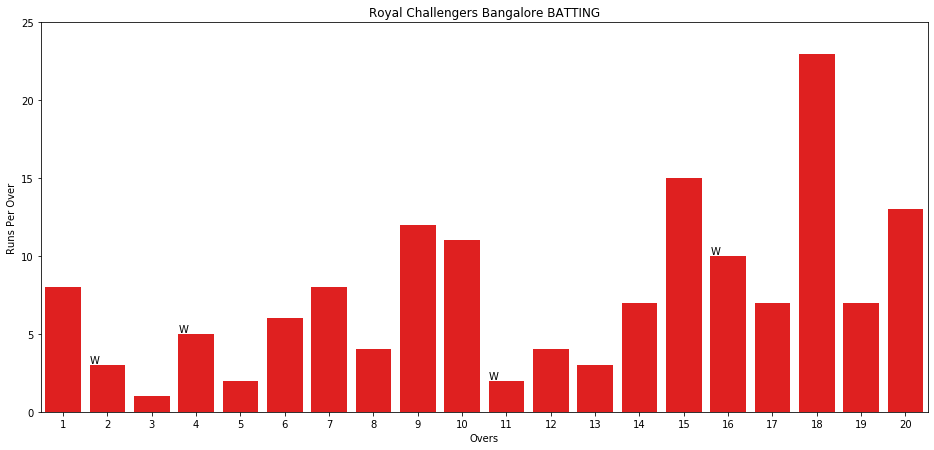

In [26]:
oo1=[]
totalruns1=[]
sum1=0
runsi=[]
for i in range(1,21):
    oo1.append(i)
    sum1=in1[in1["over"]==i]["total_runs"].sum()+sum1
    totalruns1.append(in1[in1["over"]==i]["total_runs"].sum())
    runsi.append(sum1)
df1["Overs"]=oo1
df1["Runs Per Over"]=totalruns1
df1["Runs"]=runsi
df1
plt.figure(figsize=(13,6))
plt.ylim(0,25)
plt.tight_layout()

sns.barplot(x="Overs",y="Runs Per Over",data=df1,color="red")
plt.title(Teams1+" BATTING")
for i in wi51:
    if(i==j):
        plt.text(x=i-1.4,y=wi61[i-1]+.1,s="2W")
    else:
        plt.text(x=i-1.4,y=wi61[i-1]+.1,s="W")
    j=i

Text(0.5, 1.0, 'Royal Challengers Bangalore BATTING')

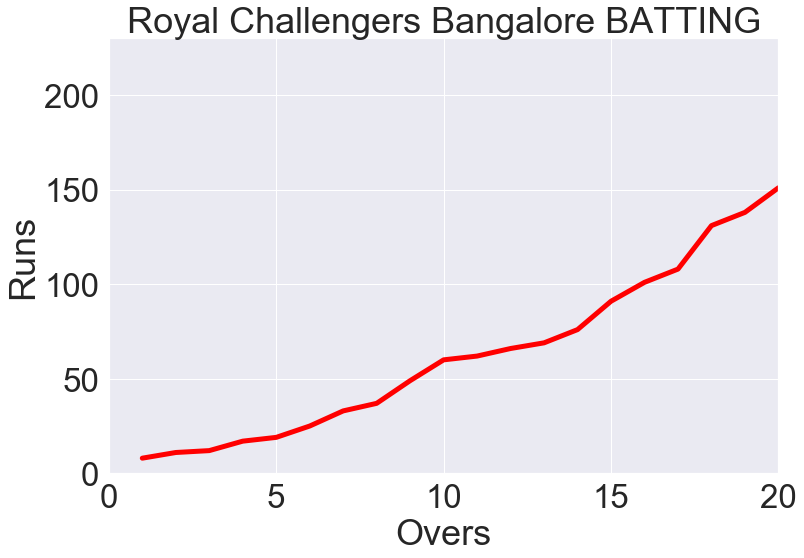

In [27]:
plt.figure(figsize=(12,8))
sns.set(font_scale=3) 
plt.tight_layout()
plt.ylim(0,230)
plt.xlim(0,20)
ax=sns.lineplot(x="Overs",y="Runs",data=df1,lw=5,ls="--",color="Red")
plt.title(Teams1+" BATTING")

In [28]:

in1["Overs"]=in1["over"]
runrate1plot=in1.groupby("over")
runrate1plot=runrate1plot.mean()

runrate1plot=runrate1plot.drop(["inning","is_super_over","wide_runs","legbye_runs","noball_runs","bye_runs",
                                "batsman_runs","extra_runs","wickets","ball"],axis=1)
rr1=runrate1plot.drop(["total_runs","WicketsFallen","Score","Overs"],axis=1)
rr1

,Run Rate
over,
1,2.428571
2,4.527778
3,3.555556
4,3.775000
5,3.394444
6,3.928571
7,4.258929
8,4.310185
9,4.742593


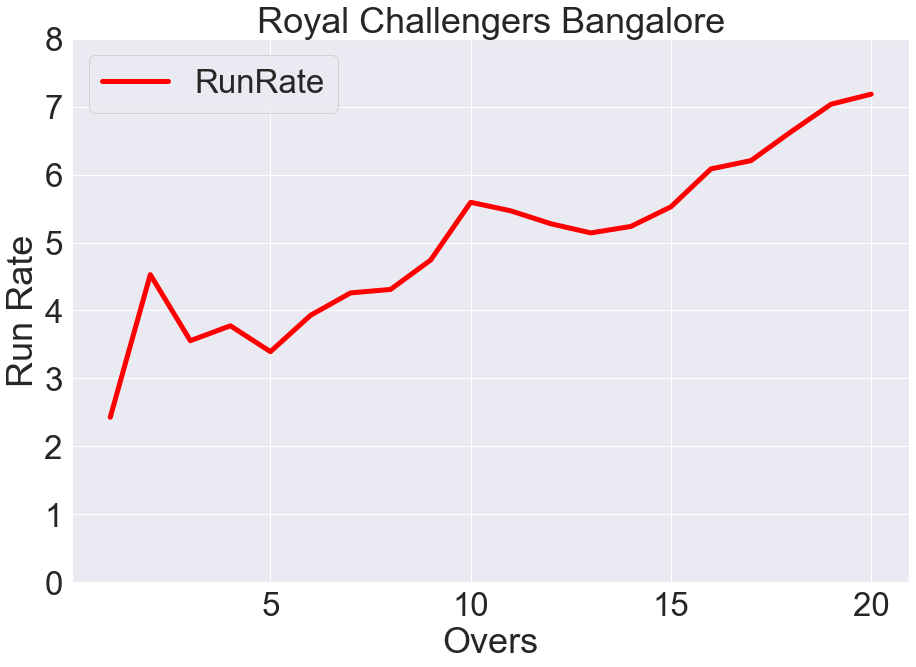

In [29]:
plt.figure(figsize=(15,10))
plt.ylim(0,8)
plt.title(Teams1)
sns.lineplot(x='Overs',y='Run Rate',data=runrate1plot,label='RunRate',lw=5,color='red')


In [30]:
bestbatsman1=list(score1bat.sort_values('runs',ascending=False)
                  ['Batsman'])[0]
bestbatsman1
kl=in1[in1['batsman']==bestbatsman1]
bsk=kl['bowler'].unique()
bestbatsmanb1=pd.DataFrame()
bestbatsmanb1['Bowler']=bsk
bsk21=[]
for i in bsk:
    bsk21.append(kl[kl['bowler']==i]['total_runs'].sum())
bestbatsmanb1['Runs']=bsk21
bestbatsmanb1['Bowler']=bestbatsmanb1['Bowler'].apply(lambda x:x.upper())
print(bestbatsman1+'VS'+Teams2)
bestbatsmanb1

KL RAHULVSMumbai Indians


,Bowler,Runs
0,KH PANDYA,9
1,MJ MCCLENAGHAN,27
2,HARBHAJAN SINGH,7
3,JJ BUMRAH,20
4,TG SOUTHEE,4
5,KA POLLARD,7


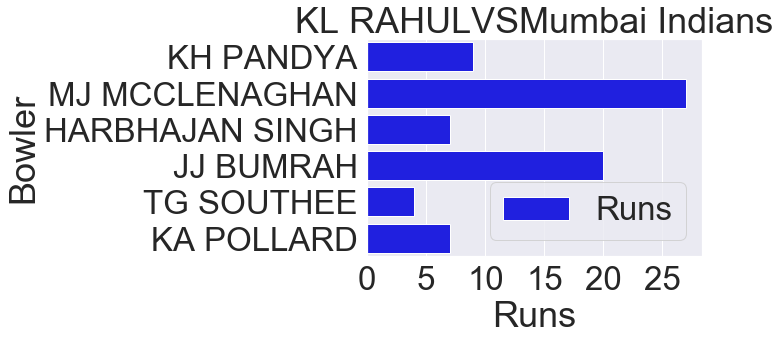

In [31]:
runchart=sns.barplot(y='Bowler',x='Runs',data=bestbatsmanb1,label='Runs',
                     color='Blue').legend()
plt.title(bestbatsman1.upper()+'VS'+Teams2)
sns.set(font_scale=1)
plt.show()

In [32]:
ovs1=in1.groupby('over')
overbyover1=pd.DataFrame()
overs11=['0-5','6-10','11-15','16-20']
overs12=[]
overs12.append(ovs1.sum().loc[1:5]['total_runs'].sum())
overs12.append(ovs1.sum().loc[6:10]['total_runs'].sum())
overs12.append(ovs1.sum().loc[11:15]['total_runs'].sum())
overs12.append(ovs1.sum().loc[16:20]['total_runs'].sum())

overbyover1['OVER RANGE']=overs11
overbyover1['Runs']=overs12
print(Teams1+'Over Comparison')
overbyover1

Royal Challengers BangaloreOver Comparison


,OVER RANGE,Runs
0,0-5,19
1,6-10,41
2,11-15,31
3,16-20,60


Text(0.5, 1.0, 'Royal Challengers Bangalore Batting')

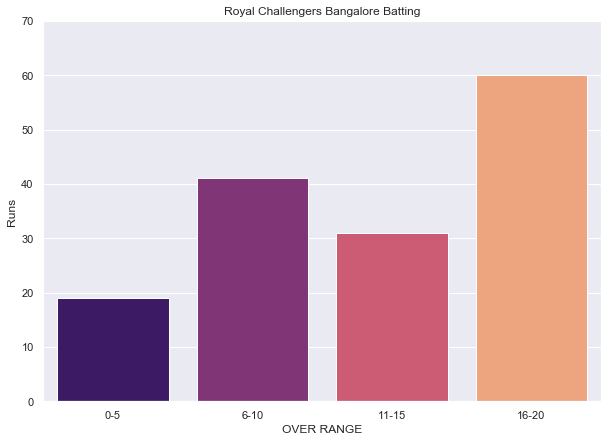

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x="OVER RANGE",y="Runs",data=overbyover1,palette='magma')
plt.ylim(0,70)
plt.title(Teams1+ " Batting")

In [34]:
bestbowler1=in1.groupby('bowler').sum().sort_values(['wickets','total_runs'],ascending=[False,False]).head(1)
bestbowler1=list(bestbowler1.index)[0]
mm=list(in1[in1['bowler']==bestbowler1].groupby('over').sum()['wickets'])
mm2=list(in1[in1['bowler']==bestbowler1].groupby('over').sum().index)
mmr=list(in1[in1['bowler']==bestbowler1].groupby('over').sum()['total_runs'])
bbf1=in1[in1['bowler']==bestbowler1].groupby('over').sum()

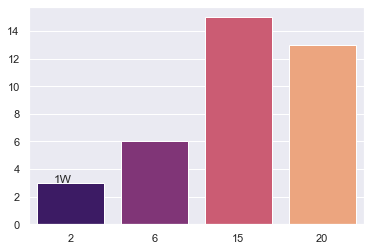

In [35]:
sns.barplot(x=mm2,y=mmr,data=bbf1,palette='magma')
count=0
count1=0
for i in mm:
    if i>0:
        plt.text(x=count-.2,y=mmr[count1],s=str(i)+'W')
        count1+=1
        count=count+1      

(0, 61)

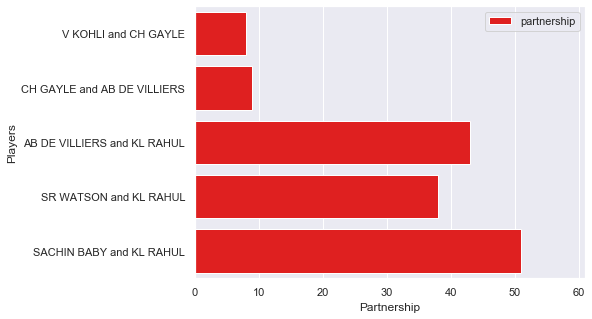

In [36]:
in1['Overs']=in1['over']
mask1=in1['wickets']==1
mask2=in1['over']==20
mask3=in1['ball']==6
mask2=mask2&mask3
mask2=mask2 | mask1
pt1=in1[mask2]
partnership1=[]
j=0
pts=list(pt1['Score'])
for i in range(0,len(pts)):
    if (i!=0):
        partnership1.append(pts[i]-pts[i-1])
    else:
        partnership1.append(pts[i])
pt1['Partnership']=partnership1
pt1['Players']=pt1['batsman']+" and "+pt1["non_striker"]
pt1=pt1.drop(['inning','batting_team','bowling_team','is_super_over',"wide_runs","bye_runs","noball_runs","total_runs",
              "legbye_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind",
              "fielder","wickets","over","ball","bowler","Overs"],axis=1)
pt1.reset_index(drop=True)
max1=pt1["Partnership"].max()
plt.figure(figsize=(7,5))
sns.barplot(x="Partnership",y="Players",orient="h",data=pt1,label="partnership",color="red").legend()
plt.xlim(0,max1+10)

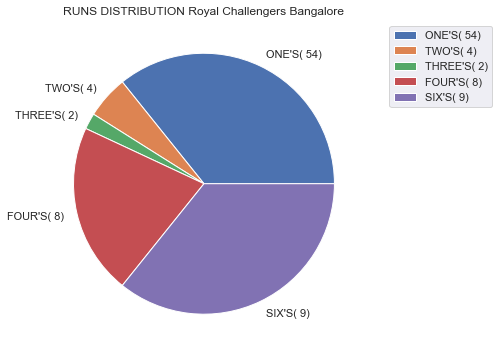

In [37]:
rund1=list(in1["total_runs"])
ones1=[]
two1=[]
three1=[]
four1=[]
six1=[]
dots1=[]

for i in rund1:
    if(i==1):
        ones1.append(i)
    elif(i==2):
        two1.append(i)
    elif(i==3):
        three1.append(i)
    elif(i==4):
        four1.append(i)
    elif(i==6):
        six1.append(i)
    else:
        dots1.append(i+1)
        
ones1=np.array(ones1).sum()
two1=np.array(two1).sum()
three1=np.array(three1).sum()
four1=np.array(four1).sum()
six1=np.array(six1).sum()
dots1=np.array(dots1).sum()


runsdist1=[ones1,two1,three1,four1,six1]

plt.figure(figsize=(7,6))
plt.title("RUNS DISTRIBUTION "+ Teams1)

a=plt.pie(runsdist1,labels=["ONE'S"+"( "+str(runsdist1[0])+")","TWO'S"+"( "+str(int(runsdist1[1]/2))+")","THREE'S"+"( "+str(int(runsdist1[1]/3))+")",
                            "FOUR'S"+"( "+str(int(runsdist1[3]/4))+")","SIX'S"+"( "+str(int(runsdist1[4]/6))+")"])
plt.legend(bbox_to_anchor=(1.4, 1))

In [38]:
t1=in1['total_runs'].sum()+1
r1=list(in1.tail(1)['Run Rate'])
r1=round(r1[0],3)

In [39]:
s=("{} requires {} Runs in 20 overs at {} Runs per Over").format(Teams2,t1,r1)
print(s)

Mumbai Indians requires 152 Runs in 20 overs at 7.19 Runs per Over


In [40]:
in12=in2.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","legbye_runs","noball_runs","bye_runs",
               "batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder",
               "wickets","ball"],axis=1)
score2=list(in12['total_runs'])
csscore2=[]
runrate2=[]
sum2=0
rr2=0
ballcount2=1
overcount2=1
for i in score2:
    sum2=sum2+i
    rr2=sum2/overcount2
    runrate2.append(rr2)
    ballcount2=ballcount2+1
    csscore2.append(sum2)
    if (ballcount2==7):
        ballcount2=1
        overcount2=overcount2+1
in12['Score']=csscore2
in12['Run Rate']=runrate2
in12=in12.groupby('over')
print('\t\t\t Over by Over Details:'+ Teams2)
in2['Score']=csscore2
in2['Run Rate']=runrate2
in12.last()
in2['Score']=csscore2
in2['Run Rate']=runrate2
in12.last()

			 Over by Over Details:Mumbai Indians


,batsman,non_striker,bowler,total_runs,WicketsFallen,Score,Run Rate
over,,,,,,,
1,RG SHARMA,PA PATEL,STR BINNY,0,0,2,2.000000
2,AT RAYUDU,RG SHARMA,S ARAVIND,0,1,4,2.000000
3,RG SHARMA,AT RAYUDU,CJ JORDAN,0,1,16,4.000000
4,AT RAYUDU,RG SHARMA,S ARAVIND,1,1,23,4.600000
5,AT RAYUDU,RG SHARMA,SR WATSON,1,1,30,5.000000
6,AT RAYUDU,RG SHARMA,S ARAVIND,1,1,39,5.571429
7,AT RAYUDU,RG SHARMA,YS CHAHAL,0,1,43,5.375000
8,RG SHARMA,AT RAYUDU,CJ JORDAN,0,1,52,5.777778
9,RG SHARMA,AT RAYUDU,YS CHAHAL,1,1,58,5.800000


In [41]:
score2bat=pd.DataFrame()
score2bat["Batsman"]=bat2
r2=[]
b2=[]
f4_2=[]
s6_2=[]
sr2=[]
bowl2=[]
for i in bat2:
   
    k=d[d["batsman"]==i]
    r2.append(k["total_runs"].sum())
    b2.append(k["total_runs"].count())
    f4_2.append(len(k[k["total_runs"]==4]))
    s6_2.append(len(k[k["total_runs"]==6]))
    sr2.append(k["total_runs"].sum()/k["total_runs"].count()*100)
    mm=k[k["dismissal_kind"]!=0]
    mm=list(mm["bowler"])
    
    mm=str(mm).replace('[',"").replace(']',"").replace("'","").split(",")[0]
    if(mm==""):
        mm="NotOut"
        
    bowl2.append(mm)
    
score2bat["runs"]=r2
score2bat["balls"]=b2
score2bat["4's"]=f4_2
score2bat["6's"]=s6_2
score2bat["Strike Rate"]=sr2
score2bat["Dismissed By"]=bowl2
score2bat.name="MI BATTING CARD"
print("\t\t" ,score2bat.name)
wiw2=len(score2bat["runs"])
wi2=len(score2bat[score2bat["Dismissed By"]=="NotOut"])
print("\t\t\t" ,score2bat["runs"].sum() ,"/", wiw2-wi2 )
score2bat

		 MI BATTING CARD
			 153 / 4


,Batsman,runs,balls,4's,6's,Strike Rate,Dismissed By
0,RG SHARMA,28,26,3,0,107.692308,VR AARON
1,PA PATEL,1,2,0,0,50.000000,S ARAVIND
2,AT RAYUDU,45,48,2,2,93.750000,VR AARON
3,N RANA,9,11,0,1,81.818182,YS CHAHAL
4,KA POLLARD,39,23,3,2,169.565217,NotOut
5,JC BUTTLER,31,12,1,3,258.333333,NotOut


In [42]:
rb2=[]
overs2=[]
scoreball2=pd.DataFrame()
scoreball2["Bowler"]=ball2
wickets2=[]
economy2=[]
maiden2=[]
dots2=[]
for i in ball2:
   
    k=d[d["bowler"]==i]
    rb2.append(k["total_runs"].sum())
    overs2.append(k["over"].nunique())
    overs=k["over"].nunique()
    l1=k["dismissal_kind"]!=0
    l2=k["dismissal_kind"]!="run out"
    q2=len(k[l1&l2])
    wickets2.append(q2)
    economy2.append(k["total_runs"].sum()/k["over"].nunique())
    w1=0
    w2=6
    ov=[]
    for j in range(0,overs):
        if(k["total_runs"].sum()==0):
            ov[j]=1
    ov2 =np.array(ov,dtype=int)
    maiden2.append(ov2.sum())
    dots2.append(len(k[k["total_runs"]==0]))
scoreball2["Overs"]=overs2
scoreball2["Runs"]=rb2
scoreball2["Dots"]=dots2
scoreball2["Maiden"]=maiden2
scoreball2["Wickets"]=wickets2
scoreball2["Economy"]=economy2
scoreball2.name=Teams1
print("\t\t"+scoreball2.name+ " Bowling")
scoreball2

		Royal Challengers Bangalore Bowling


,Bowler,Overs,Runs,Dots,Maiden,Wickets,Economy
0,STR BINNY,1,2,4,0,0,2.000000
1,S ARAVIND,4,23,10,0,1,5.750000
2,CJ JORDAN,3,37,5,0,0,12.333333
3,SR WATSON,3,38,6,0,0,12.666667
4,YS CHAHAL,4,16,9,0,1,4.000000
5,VR AARON,4,37,9,0,2,9.250000


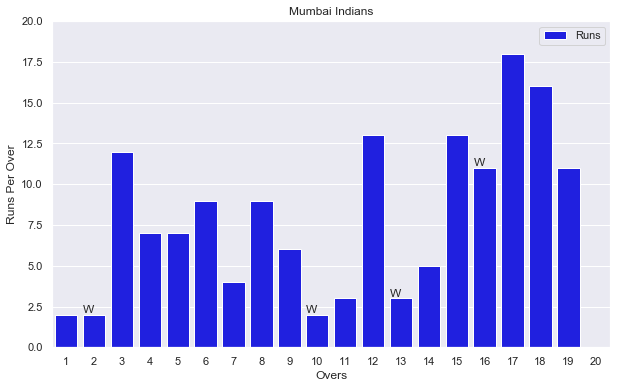

In [43]:
oo2=[]
totalruns2=[]
sum2=0
runsi2=[]
for i in range(1,21):
    oo2.append(i)
    sum2=in2[in2["over"]==i]["total_runs"].sum()+sum2
    totalruns2.append(in2[in2["over"]==i]["total_runs"].sum())
    runsi2.append(sum2)
df2["Overs"]=oo2
df2["Runs Per Over"]=totalruns2
df2["Runs"]=runsi2
df2
plt.figure(figsize=(10,6))
plt.ylim(0,20)
sns.barplot(x="Overs",y="Runs Per Over",data=df2,color="blue",label="Runs").legend()
plt.title( Teams2)
for i in wi52:
    if(i==j):
        plt.text(x=i-1.4,y=wi62[i-1]+3,s="W")
    else:
        plt.text(x=i-1.4,y=wi62[i-1]+.1,s="W")
    j=i

AT RAYUDU vs Royal Challengers Bangalore


,Bowler,Runs
0,S ARAVIND,18
1,SR WATSON,8
2,YS CHAHAL,8
3,CJ JORDAN,2
4,VR AARON,9


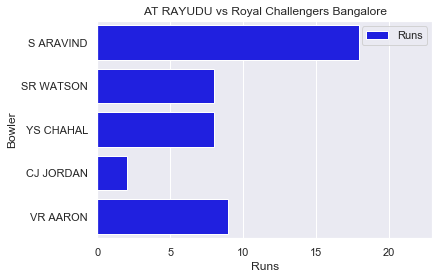

<Figure size 504x360 with 0 Axes>

In [44]:
bestbatsman2=list(score2bat.sort_values("runs",ascending=False)["Batsman"])[0]
bestbatsman2
sk2=in2[in2["batsman"]==bestbatsman2]
bsk2=sk2["bowler"].unique()
bestbatsmanb2=pd.DataFrame()
bestbatsmanb2["Bowler"]=bsk2
bsk22=[]
for i in bsk2:
    bsk22.append(sk2[sk2["bowler"]==i]["total_runs"].sum())
bestbatsmanb2["Runs"]=bsk22
bestbatsmanb2["Bowler"]=bestbatsmanb2["Bowler"].apply(lambda x:x.upper())
bestbatsmanb2
bestbatsmanb2["Runs"].max()
ax=sns.barplot(y="Bowler",x="Runs",data=bestbatsmanb2,orient="h",label="Runs",color='blue').legend()
plt.title(bestbatsman2.upper()+ " vs " +Teams1)
plt.xlim(0,bestbatsmanb2["Runs"].max()+5)
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
print(bestbatsman2+" vs "+Teams1)
bestbatsmanb2

In [45]:
ovs2=in2.groupby("over")
overbyover2=pd.DataFrame()
osat52=[]
osat42=["0-5","6-10","11-15","16-20"]
osat52.append(ovs2.sum().loc[1:5]["total_runs"].sum())
osat52.append(ovs2.sum().loc[6:10]["total_runs"].sum())
osat52.append(ovs2.sum().loc[11:15]["total_runs"].sum())
osat52.append(ovs2.sum().loc[16:20]["total_runs"].sum())
osat52
overbyover2["OVER_RANGE"]=osat42
overbyover2["Runs"]=osat52
print(Teams2 +" Over Comparision")
overbyover2

Mumbai Indians Over Comparision


,OVER_RANGE,Runs
0,0-5,30
1,6-10,30
2,11-15,37
3,16-20,56


Text(0.5, 1, 'Mumbai Indians Batting')

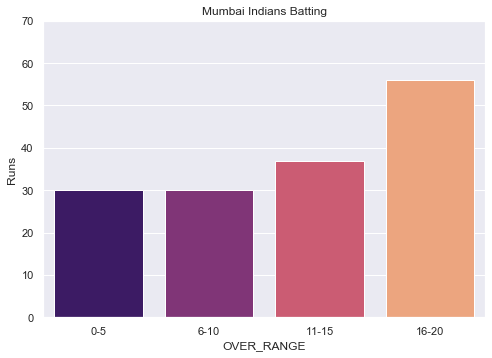

In [46]:

plt.figure(figsize=(7,5))
sns.barplot(x="OVER_RANGE",y="Runs",data=overbyover2,palette='magma')
plt.ylim(0,70)
plt.tight_layout()
plt.title(Teams2+  " Batting")

(0, 25)

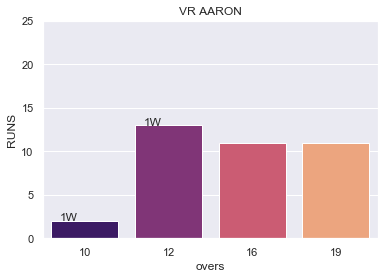

In [47]:
bestbowler2=in2.groupby("bowler").sum().sort_values(["wickets","total_runs"],ascending=[False,False]).head(1)
bestbowler2=list(bestbowler2.index)[0]
bestbowler2
bbr2=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum()["total_runs"])
bbr2
bbo2=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum()["wickets"])
bbo2
bbo21=list(in1[in1["bowler"]==bestbowler1].groupby("over").sum().index)
bbo21
bbo22=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum().index)
bbo22
bbf2=in2[in2["bowler"]==bestbowler2].groupby("over").sum()
sns.barplot(x=bbo22,y=bbr2,data=bbf2,palette='magma')
plt.xlabel("overs")
plt.ylabel("RUNS")
count2=0
c1=0
for i in bbo2:
    if(i>0):
        plt.text(x=count2-.3,y=bbr2[c1],s=str(i)+"W")
        count2=count2+1
        c1=c1+1
    
plt.title(bestbowler2.upper())
plt.ylim(0,25)

In [48]:
score2=list(in2["total_runs"])
cscore2=[]
runrate2=[]
sum2=0
rr2=0
ballcount2=1
overcount2=1
for i in score2:
    sum2=sum2+i
    
    rr2=sum2/overcount2
    runrate2.append(rr2)
    
    ballcount2=ballcount2+1
    cscore2.append(sum2)
    if(ballcount2==7):
        ballcount2=1
        overcount2=overcount2+1
cscore2
in2["Score"]=cscore2
in2["Run Rate"]=runrate2

In [49]:

in2["Overs"]=in2["over"]
runrate2plot=in2.groupby("over")
runrate2plot=runrate2plot.mean()
runrate2plot

runrate2plot=runrate2plot.drop(["inning","is_super_over","wide_runs","legbye_runs","noball_runs","bye_runs","batsman_runs","extra_runs","wickets","ball"],axis=1)
rr2=runrate2plot.drop(["total_runs","WicketsFallen","Score","Overs"],axis=1)
rr2

,Run Rate
over,
1,1.500000
2,1.583333
3,3.666667
4,4.333333
5,5.038889
6,5.750000
7,5.744048
8,5.978175
9,5.850000


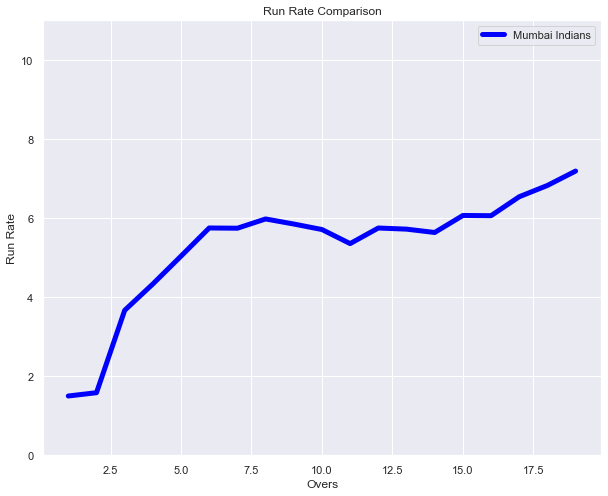

In [50]:
plt.figure(figsize=(10,8))
plt.ylim(0,11)
plt.title("Run Rate Comparison" )
sns.lineplot(x="Overs",y="Run Rate",data=runrate2plot,label=Teams2,color="Blue",lw=5)

In [51]:
mask12=in2["wickets"]==1
mask22=in2["over"]==20 
mask32=in2["ball"]==6
mask22=mask22 & mask32
mask22=mask22 | mask12
pt2=in2[mask22]
patnership2=[]
j2=0
pts2=list(pt2["Score"])
for i in range(0,len(pts2)):
    if(i!=0):
        patnership2.append(pts2[i]-pts2[i-1])
    else:
         patnership2.append(pts2[i])
patnership2
pt2["Patnership"]=patnership2
pt2["Players"]=pt2["batsman"]+ " and "+ pt2["non_striker"]
pt2=pt2.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","bye_runs","noball_runs","total_runs",
              "legbye_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder","wickets",
              "over","ball","bowler","Overs"],axis=1)
pt2.reset_index(drop=True,inplace=True)
max2=pt2["Patnership"].max()
pt2

,batsman,non_striker,WicketsFallen,Score,Run Rate,Patnership,Players
0,PA PATEL,RG SHARMA,1,2,1.000000,2,PA PATEL and RG SHARMA
1,RG SHARMA,AT RAYUDU,2,60,6.000000,58,RG SHARMA and AT RAYUDU
2,N RANA,AT RAYUDU,3,79,5.642857,19,N RANA and AT RAYUDU
3,AT RAYUDU,KA POLLARD,4,98,6.125000,19,AT RAYUDU and KA POLLARD


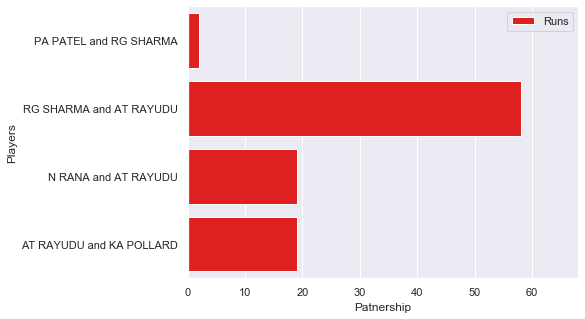

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(x="Patnership",y="Players",orient="h",data=pt2,label="Runs",color="red").legend()
plt.xlim(0,max2+10)
plt.show()

In [53]:
rund2=list(in2["total_runs"])
ones2=[]
two2=[]
three2=[]
four2=[]
six2=[]
dots2=[]
for i in rund2:
    if(i==1):
        ones2.append(i)
    elif(i==2):
        two2.append(i)
    elif(i==3):
        three2.append(i)
    elif(i==4):
        four2.append(i)
    elif(i==6):
        six2.append(i)
    else:
        dots2.append(i+1)
        
ones2=np.array(ones2).sum()
two2=np.array(two2).sum()
three2=np.array(three2).sum()
four2=np.array(four2).sum()
six2=np.array(six2).sum()
dots2=np.array(dots2).sum()
runsdist2=[ones2,two2,three2,four2,six2]

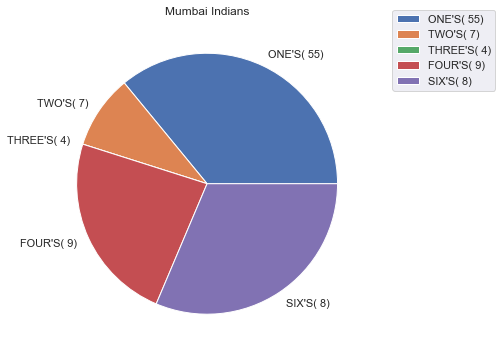

In [54]:

plt.figure(figsize=(10,6))
plt.title(Teams2)

a=plt.pie(runsdist2,labels=["ONE'S"+"( "+str(runsdist2[0])+")","TWO'S"+"( "+str(int(runsdist2[1]/2))+")","THREE'S"+"( "+str(int(runsdist2[1]/3))+")","FOUR'S"+"( "+str(int(runsdist2[3]/4))+")","SIX'S"+"( "+str(int(runsdist2[4]/6))+")"])
plt.legend(bbox_to_anchor=(1.4, 1.05))

In [55]:
s1=score1bat["runs"].sum()
s2=score2bat["runs"].sum()
WICKET1=scoreball1["Wickets"].sum()
WICKET2=scoreball2["Wickets"].sum()
if(s1>s2):
    win=s1-s2
    win1=("{} win by {} Runs").format(Teams1,win)
    print("\t\t\tResult:"+win1)
else:
    win2=10-WICKET2
    win2=("{} win by {} Wickets").format(Teams2,win2)
    print("\t\t\tResult:"+win2)

			Result:Mumbai Indians win by 6 Wickets
